# ASSIGNMENT 2  

# Analysis of Covid-19 Vaccines-Exploratory Data Analysis 

NUMBER OF TEAM MATES:
TEAM NUMBER:
TEAM MEMBERS:
ASSIGNMENT NUMBER:
ASSIGNMENT DUE DATE:

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

## (a) Importing dataset

In [56]:
df=pd.read_csv("country_vaccinations.csv")
#deleting unnecessary
del df['source_name']
del df['source_website']
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


## (b) Validate the Dataset for NULL Values

In [57]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
dtype: int64

In [58]:
#Doing a little bit of cleaning for the null values
df.daily_vaccinations = df.daily_vaccinations.fillna(0)
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)
people_vacci_mean=df.people_vaccinated.mean()
df.people_vaccinated = df.people_vaccinated.fillna(people_vacci_mean)
people_vacci_mean_per=df.people_vaccinated_per_hundred.mean()
df.people_vaccinated_per_hundred = df.people_vaccinated.fillna(people_vacci_mean_per)
people_full_vacci_mean=df.people_fully_vaccinated.mean()
df.people_fully_vaccinated = df.people_fully_vaccinated.fillna(people_full_vacci_mean)
people_full_vacci__per_mean=df.people_fully_vaccinated_per_hundred.mean()
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.fillna(people_full_vacci__per_mean)
df = df.drop(df[df.total_vaccinations.isnull()].index)
df.drop(df[df.people_vaccinated.isna()].index)
df.isnull().sum()


country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
dtype: int64

## (c) Visualize the data

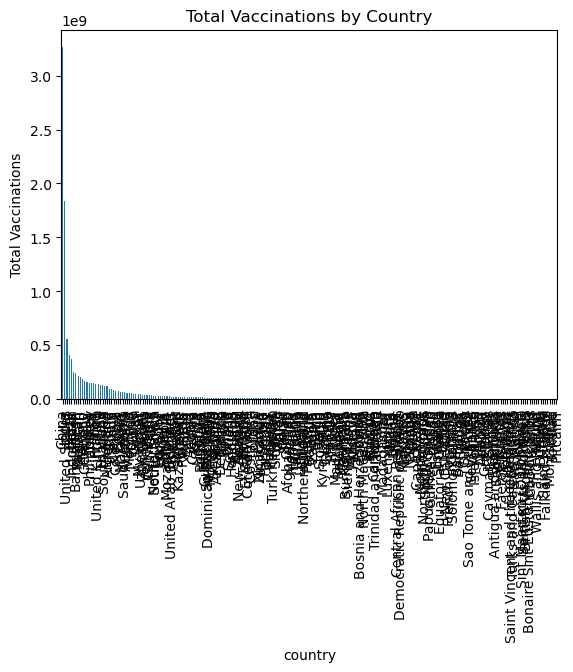

In [59]:
# Visualize the total vaccinations by country
df.groupby('country')['total_vaccinations'].max().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Vaccinations by Country')
plt.ylabel('Total Vaccinations')
plt.show()

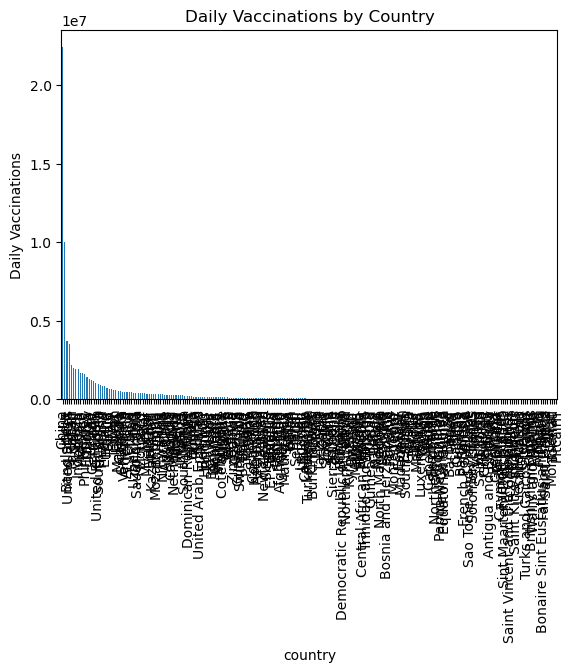

In [60]:
# Visualize the daily vaccinations by country
df.groupby('country')['daily_vaccinations'].max().sort_values(ascending=False).plot(kind='bar')
plt.title('Daily Vaccinations by Country')
plt.ylabel('Daily Vaccinations')
plt.show()

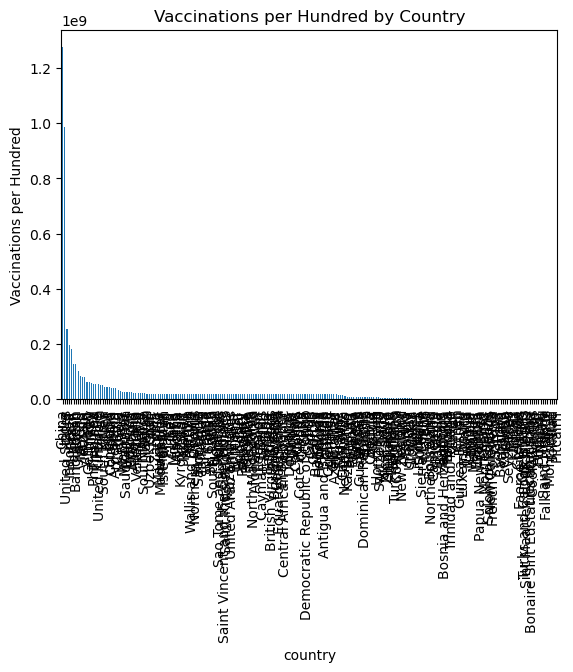

In [61]:
# Visualize the vaccinations per hundred by country
df.groupby('country')['people_vaccinated_per_hundred'].max().sort_values(ascending=False).plot(kind='bar')
plt.title('Vaccinations per Hundred by Country')
plt.ylabel('Vaccinations per Hundred')
plt.show()

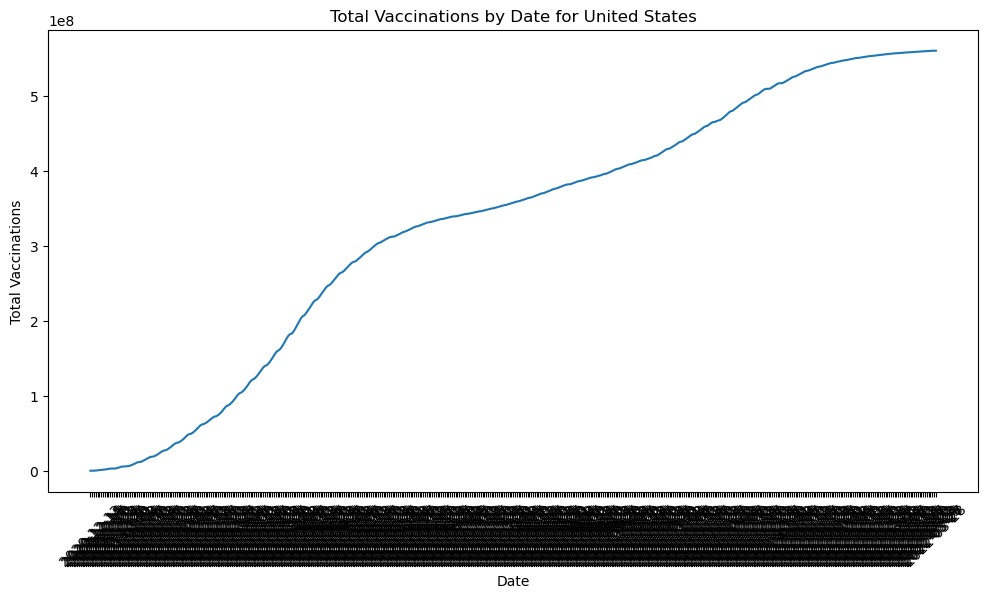

In [62]:
country_name = 'United States'
country_data = df[df['country'] == country_name]
plt.figure(figsize=(12, 6))
plt.plot(country_data['date'], country_data['total_vaccinations'])
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title(f'Total Vaccinations by Date for {country_name}')
plt.xticks(rotation=45)
plt.show()

## (d) Which country is using what vaccine?

In [63]:
# Group the data by country and vaccine type
vaccine_data = df.groupby(['country', 'vaccines']).size()

# Display the results
print(vaccine_data)

country            vaccines                                                               
Afghanistan        Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing     46
Albania            Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V                    248
Algeria            Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V                   24
Andorra            Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                42
Angola             Oxford/AstraZeneca                                                          64
                                                                                             ... 
Wales              Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                               438
Wallis and Futuna  Moderna                                                                     40
Yemen              Johnson&Johnson, Oxford/AstraZeneca, Sinovac                                22
Zambia             Johnson&

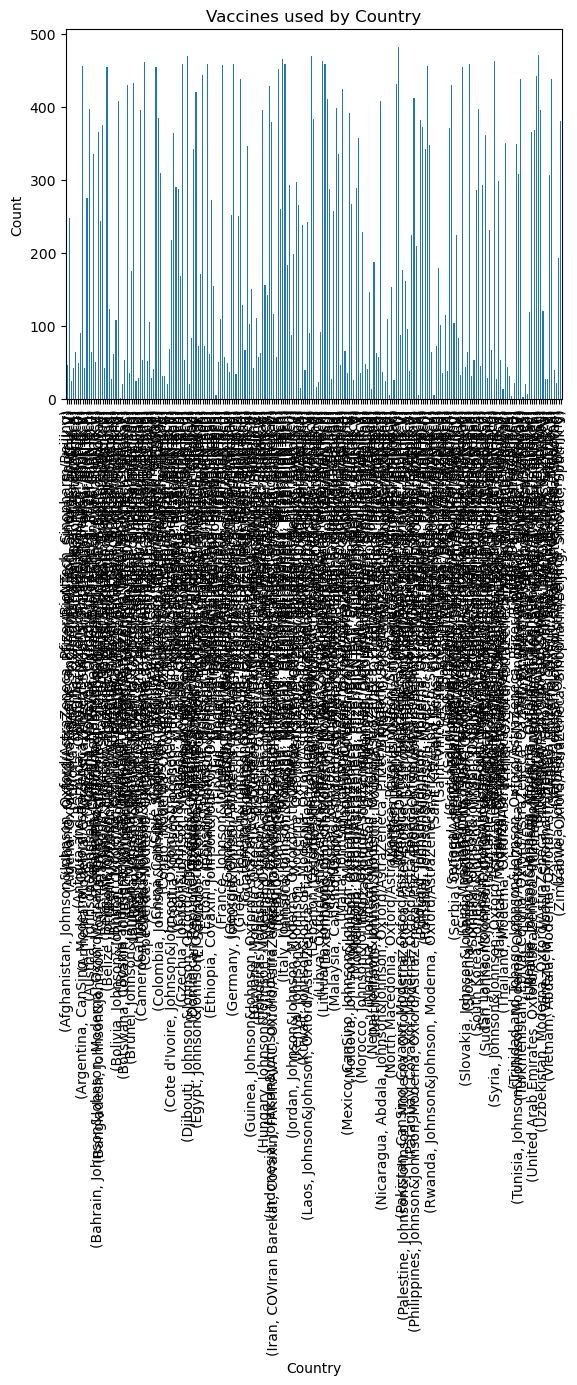

In [66]:
# Visualize the vaccines used by each country
vaccine_data.plot(kind='bar', x='country', y='counts')
plt.title('Vaccines used by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## (e)  In which country the vaccination programme is more advanced?

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43607 entries, 0 to 86511
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              43607 non-null  object 
 1   iso_code                             43607 non-null  object 
 2   date                                 43607 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    43607 non-null  float64
 5   people_fully_vaccinated              43607 non-null  float64
 6   daily_vaccinations_raw               43607 non-null  float64
 7   daily_vaccinations                   43607 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        43607 non-null  float64
 10  people_fully_vaccinated_per_hundred  43607 non-null  float64
 11  daily_vaccinations_per_milli

In [73]:
# Group the data by country and calculate the total number of vaccinations
country_totals = df.groupby(['country'])['total_vaccinations'].max().reset_index()

# Sort the data by total vaccinations and display the results
most_vaccinated = country_totals.sort_values(by='total_vaccinations', ascending=False).reset_index(drop=True)
print(most_vaccinated.head())

         country  total_vaccinations
0          China        3.263129e+09
1          India        1.834501e+09
2  United States        5.601818e+08
3         Brazil        4.135596e+08
4      Indonesia        3.771089e+08


## (f)  Where are vaccinated more people per day? But in terms of percent from entire population?

In [77]:
# Calculate vaccination rate as percentage of total vaccinations
df['vaccination_rate'] = (df['daily_vaccinations'] / df['total_vaccinations']) * 100

# Find the country with the highest vaccination rate
max_vaccination_rate_country = df[df['vaccination_rate'] == df['vaccination_rate'].max()]['country'].values[0]

print("The country with the highest vaccination rate in terms of percent from entire population is:", max_vaccination_rate_country)


The country with the highest vaccination rate in terms of percent from entire population is: Algeria
